In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='r5BTTcJzPtQAjkxLJtj8WDfMtoutEg5MlBOFmYGkUa6m',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'updateddatasetagesturebasedtoolfo-donotdelete-pr-uqmd8pc2o6fapp'
object_key = 'dataset-20221114T173550Z-001.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [3]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [5]:
ls

dataset/  PNT2022TMID35856handgesture.tgz


In [20]:
#Convolution Neural Network
#Importing tensorflow library
import tensorflow as tf
print(tf.__version__)
#Model Creation
model=tf.keras.Sequential([
                #Conv2D -To extract the essential features
                #Maxpooling - to compress the image without losing its features
                #Inupt shape of the image=128*128 pixels
                #relu - if x>0,return x;else return 0
                tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(128,128,1)),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                #Takes the image and coverts it to a linear array-flatten
                tf.keras.layers.Flatten(),
                #Hidden layers
                #softmax-Activation function that predict multinomial probability
                tf.keras.layers.Dense(512,activation='relu'),#Hidden layer1:512 neurons
                tf.keras.layers.Dense(6,activation='softmax')#Output layer=No of classifications
])

2.7.2


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)#Normalisation
#Preprocessing the Training dataset
train_gen=train_datagen.flow_from_directory(
    'dataset/train',
    #Image size:128*128
    target_size=(128,128),
    batch_size=198,
    #Train Dataset has Grayscale images
    color_mode='grayscale',
    #Since output has classification class_mode='categorical'
    class_mode='categorical'
)

Found 2376 images belonging to 6 classes.


In [22]:
#Test data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Normalisation
valid_datagen=ImageDataGenerator(rescale=1./255)
valid_gen=valid_datagen.flow_from_directory(
    'dataset/test',
    target_size=(128,128),
    batch_size=10,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 30 images belonging to 6 classes.


In [23]:
#Categorical crossentropy as output layer has 6 classes
#Optimiser-to reduce the weights or coefficients of hidden layer
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['Accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 16)      160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 16)      

In [26]:
#Train the model
trainmodel=model.fit(
    train_gen,#Preprocessed Training dataset
    steps_per_epoch=12,#Total images in training dataset/batch_size of train dataset
    epochs=2,
    validation_data=valid_gen,#Preprocessed Test dataset
    validation_steps=3#Total images in test dataset/batch_size of test dataset
)

Epoch 1/2
12/12 [==============================] - 17s 1s/step - loss: 0.0478 - Accuracy: 0.9941 - val_loss: 0.3636 - val_Accuracy: 0.9000
Epoch 2/2
12/12 [==============================] - 17s 1s/step - loss: 0.0385 - Accuracy: 0.9937 - val_loss: 0.3413 - val_Accuracy: 0.9000


In [27]:
model.save('gesture.h5')
model_json=model.to_json()
with open("model-bw.json","w") as json_file:
  json_file.write(model_json)

In [33]:
ls

dataset/  gesture.h5  model-bw.json  PNT2022TMID35856handgesture.tgz


In [29]:
!tar -zcvf PNT2022TMID35856handgesture.tgz gesture.h5

gesture.h5


In [30]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 25.3 MB/s eta 0:00:01


In [31]:
#https://{instance_ID}.eu-de.secrets-manager.appdomain.cloud
from ibm_watson_machine_learning import APIClient
wml_credentials={
                  "url":"https://eu-de.ml.cloud.ibm.com",
                  "apikey": "Pr3DmF-RTQXov0Z4-WRezikhExRbHV2PsrDdX-kjPmg7"
                }
client=APIClient(wml_credentials)

In [32]:
def guid_from_space_name(client, space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)["metadata"]["id"])

In [34]:
space_uid=guid_from_space_name(client,'gesturebasedtoolforsterilebrowsingofradiologyimages')
print("Space UID=",space_uid)

Space UID= d1770620-22c8-4c92-bc67-f356ac6cc203


In [35]:
client.set.default_space(space_uid)

'SUCCESS'

In [36]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [37]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [38]:
model_details=client.repository.store_model(model="PNT2022TMID35856handgesture.tgz",meta_props={
    client.repository.ModelMetaNames.NAME:"gesture",
    client.repository.ModelMetaNames.TYPE:"tensorflow_rt22.1",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid})
model_id=client.repository.get_model_id(model_details)

In [39]:
client.repository.download(model_id, "hand_gesture-model_new_cloud.tgz")

Successfully saved model content to file: 'hand_gesture-model_new_cloud.tgz'


'/home/wsuser/work/hand_gesture-model_new_cloud.tgz'

In [40]:
ls

dataset/    hand_gesture-model_new_cloud.tgz  PNT2022TMID35856handgesture.tgz
gesture.h5  model-bw.json


In [41]:
from tensorflow.python.keras.models import load_model
model_body = load_model('gesture.h5')

In [42]:
from keras.models import load_model
from keras.preprocessing import image

In [43]:
model=load_model('gesture.h5')

In [49]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='r5BTTcJzPtQAjkxLJtj8WDfMtoutEg5MlBOFmYGkUa6m',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'updateddatasetagesturebasedtoolfo-donotdelete-pr-uqmd8pc2o6fapp'
object_key = 'dataset-20221114T173550Z-001.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [50]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

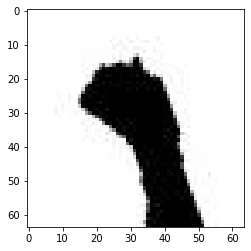

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs=mpimg.imread(path)
imgplot=plt.imshow(imgs)
plt.show()

In [52]:
img=image.load_img(path,color_mode='grayscale',target_size=(128,128))
#image to array
x=image.img_to_array(img)

In [53]:
x.shape

(128, 128, 1)

In [54]:
import numpy as np
x=np.expand_dims(x,axis=0)
x.shape

(1, 128, 128, 1)

In [55]:
pred=np.argmax(model.predict(x),axis=-1)
#predicting the class
index=['0','1','2','3','4','5']

In [56]:
pred

array([0])

In [57]:
result=str(index[pred[0]])

In [58]:
result

'0'

In [59]:
test_img = []

for i in range(0,6):
    for j in range(0,5):
        path = "dataset/test/"+str(i)+"/"+str(j)+".jpg"
        img = image.load_img(path,color_mode = "grayscale",target_size= (128,128))
        x = image.img_to_array(img)
        x = np.expand_dims(x,axis = 0)
        pred = np.argmax(model.predict(x), axis=-1)
        test_img.append(pred)
print(test_img)

[array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([2]), array([2]), array([1]), array([2]), array([2]), array([3]), array([3]), array([3]), array([5]), array([3]), array([4]), array([4]), array([4]), array([4]), array([5]), array([5]), array([5]), array([5]), array([5]), array([5])]


In [60]:
test_res = []
index=['0','1','2','3','4','5']
for i in test_img:
    test_res.append(index[i[0]])
print(test_res)

['0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '2', '2', '1', '2', '2', '3', '3', '3', '5', '3', '4', '4', '4', '4', '5', '5', '5', '5', '5', '5']
